# Análisis Exploratorio de Datos: Exploración de Datos Clínicos
Este notebook nos permitirá explorar los datos clínicos del estudio, provenientes de los archivos CDR.csv y DXSUM.csv (de ADNI).

## Objetivos
1. ✅ Identificar los patrones de distribución en las escalas CDR y sus componentes para establecer rangos normales y atípicos.
2. ✅ Caracterizar los diferentes diagnósticos y su prevalencia en la población estudiada.
3. ✅ Analizar la progresión temporal de los síntomas clínicos y diagnósticos en pacientes con múltiples visitas.
4. ✅ Establecer correlaciones entre las variables de CDR y los diagnósticos para identificar marcadores clínicos predictivos.
5. ✅ Detectar subgrupos de pacientes con características clínicas o comorbilidades específicas que puedan influir en la detección temprana.
6. ✅ Formular recomendaciones concretas para el preprocesamiento y tratamiento de los datos clínicos en fases posteriores.

***

### Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, Markdown
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Inicializar EDA

In [4]:
print("Análisis Exploratorio de Datos Clínicos")
print("Proyecto de Detección Temprana de Alzheimer")
print("Fecha: ", pd.Timestamp.now().strftime("%Y-%m-%d"))

Análisis Exploratorio de Datos Clínicos
Proyecto de Detección Temprana de Alzheimer
Fecha:  2025-04-09


### Configuración de Visualización

In [2]:
# Configuración de estilos (actualizado)
sns.set_theme(style="whitegrid", font_scale=1.2)  # Reemplazo plt.style.use('seaborn') y sns.set()
plt.rcParams['figure.figsize'] = (12, 8)

# Suprimir advertencias
import warnings
warnings.filterwarnings('ignore')

### Cargar Datos

In [3]:
# Ruta a los archivos
data_path = "../data/raw/adni/clinical/"
cdr_path = os.path.join(data_path, "CDR.csv")
dxsum_path = os.path.join(data_path, "DXSUM.csv")

# Cargar archivos
try:
    cdr_df = pd.read_csv(cdr_path)
    print(f"✓ Archivo CRD cargado: {cdr_path}")
    print(f"  - Dimensiones: {cdr_df.shape[0]} filas, {cdr_df.shape[1]} columnas")
except FileNotFoundError:
    print(f"✗ Archivo no encontrado: {cdr_path}")
    cdr_df = None

try:
    dxsum_df = pd.read_csv(dxsum_path)
    print(f"✓ Archivo JANSSEN_PLASMA_P217_TAU cargado: {dxsum_path}")
    print(f"  - Dimensiones: {dxsum_df.shape[0]} filas, {dxsum_df.shape[1]} columnas")
except FileNotFoundError:
    print(f"✗ Archivo no encontrado: {dxsum_path}")
    dxsum_df = None

✓ Archivo CRD cargado: ../data/raw/adni/clinical/CDR.csv
  - Dimensiones: 14102 filas, 25 columnas
✓ Archivo JANSSEN_PLASMA_P217_TAU cargado: ../data/raw/adni/clinical/DXSUM.csv
  - Dimensiones: 14880 filas, 41 columnas


### Exploración Inicial de Datos CRD (Clinical Dementia Rating)

#### Información básica del conjunto de datos CRD:

In [4]:
display(cdr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14102 entries, 0 to 14101
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PHASE                 14102 non-null  object 
 1   PTID                  14102 non-null  object 
 2   RID                   14102 non-null  int64  
 3   VISCODE               14102 non-null  object 
 4   VISCODE2              14087 non-null  object 
 5   VISDATE               14095 non-null  object 
 6   CDSOURCE              13935 non-null  float64
 7   CDVERSION             9117 non-null   float64
 8   SPID                  3973 non-null   float64
 9   CDMEMORY              14006 non-null  float64
 10  CDORIENT              14007 non-null  float64
 11  CDJUDGE               14007 non-null  float64
 12  CDCOMMUN              14006 non-null  float64
 13  CDHOME                14006 non-null  float64
 14  CDCARE                14006 non-null  float64
 15  CDGLOBAL           

None

#### Primeras filas del conjunto de datos CRD:

In [5]:
display(cdr_df.head())

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,CDSOURCE,CDVERSION,SPID,CDMEMORY,...,CDGLOBAL,CDRSB,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,sc,sc,2005-08-17,1.0,NaN,NaN,0.0,...,0.0,0.0,8,107,2005-08-17,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
1,ADNI1,011_S_0003,3,sc,sc,2005-08-18,1.0,NaN,NaN,1.0,...,1.0,4.5,10,107,2005-08-18,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
2,ADNI1,022_S_0004,4,sc,sc,2005-08-18,1.0,NaN,NaN,0.5,...,0.5,1.0,12,10,2005-08-18,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
3,ADNI1,011_S_0005,5,sc,sc,2005-08-23,1.0,NaN,NaN,0.0,...,0.0,0.0,14,107,2005-08-23,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
4,ADNI1,022_S_0007,7,sc,sc,2005-08-25,1.0,NaN,NaN,1.0,...,1.0,6.0,16,10,2005-08-25,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0


#### Estadísticas descriptivas de CRD:

In [7]:
display(cdr_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
RID,14102.0,3398.368387,2684.490582,2.0,865.0,4099.5,5073.5,10635.0
CDSOURCE,13935.0,1.096017,0.320525,-1.0,1.0,1.0,1.0,2.0
CDVERSION,9117.0,1.083690,0.390085,1.0,1.0,1.0,1.0,3.0
SPID,3973.0,1.060659,0.383569,1.0,1.0,1.0,1.0,10.0
CDMEMORY,14006.0,0.489183,0.577244,-1.0,0.0,0.5,0.5,3.0
CDORIENT,14007.0,0.324873,0.553694,-1.0,0.0,0.0,0.5,3.0
CDJUDGE,14007.0,0.368923,0.517807,-1.0,0.0,0.5,0.5,3.0
CDCOMMUN,14006.0,0.264601,0.510608,-1.0,0.0,0.0,0.5,3.0
CDHOME,14006.0,0.302406,0.572636,-1.0,0.0,0.0,0.5,3.0
CDCARE,14006.0,0.121805,0.443623,-1.0,0.0,0.0,0.0,3.0


#### Valores faltantes en CDR

In [12]:
# Crear lo Serie Pandas con el conteo de valores nulos
missing_crd = cdr_df.isnull().sum()

# Crea una Serie para almacenar el porcentaje de valores nulos
missing_percent_crd = (missing_crd / len(cdr_df)) * 100
# Concatena las dos Series creadas anteriormente
missing_data_crd = pd.concat([missing_crd, missing_percent_crd], axis=1, 
                           keys=['Total Missing', 'Percent Missing'])
# Muestra la Serie concatenada final
display(missing_data_crd[missing_data_crd['Total Missing'] > 0].sort_values('Total Missing', ascending=False))
print(missing_data_crd.shape)

,Total Missing,Percent Missing
HAS_QC_ERROR,13082,92.766983
LANGUAGE_CODE,13082,92.766983
DD_CRF_VERSION_LABEL,13082,92.766983
SPID,10129,71.826691
USERDATE2,5366,38.051340
CDVERSION,4985,35.349596
CDRSB,230,1.630974
CDSOURCE,167,1.184229
CDGLOBAL,101,0.716210
CDCARE,96,0.680755


(25, 2)


### Exploración Inicial de los Datos DXSUM (Diagnostic Summary)

#### Información básica del conjunto de datos DXSUM:

In [14]:
display(dxsum_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14880 entries, 0 to 14879
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PHASE                 14880 non-null  object 
 1   PTID                  14880 non-null  object 
 2   RID                   14880 non-null  int64  
 3   VISCODE               14880 non-null  object 
 4   VISCODE2              14866 non-null  object 
 5   EXAMDATE              14787 non-null  object 
 6   DIAGNOSIS             14842 non-null  float64
 7   DXNORM                3868 non-null   float64
 8   DXNODEP               3868 non-null   float64
 9   DXMCI                 3868 non-null   float64
 10  DXMDES                11664 non-null  object 
 11  DXMPTR1               8414 non-null   float64
 12  DXMPTR2               8402 non-null   float64
 13  DXMPTR3               8408 non-null   float64
 14  DXMPTR4               8414 non-null   float64
 15  DXMPTR5            

None

#### Primeras filas del conjunto de datos DXSUM:

In [15]:
display(dxsum_df.head())

,PHASE,PTID,RID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,DXNORM,DXNODEP,DXMCI,...,DXODES,DXCONFID,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,bl,bl,2005-09-29,1.0,1.0,-4.0,-4.0,...,-4.0,4.0,2,107,2005-10-01,NaN,NaN,NaN,NaN,2005-10-01 00:00:00.0
1,ADNI1,011_S_0003,3,bl,bl,2005-09-30,3.0,-4.0,-4.0,-4.0,...,-4.0,3.0,4,107,2005-10-01,NaN,NaN,NaN,NaN,2005-10-01 00:00:00.0
2,ADNI1,011_S_0005,5,bl,bl,2005-09-30,1.0,1.0,-4.0,-4.0,...,-4.0,4.0,6,107,2005-10-01,NaN,NaN,NaN,NaN,2005-10-01 00:00:00.0
3,ADNI1,011_S_0008,8,bl,bl,2005-09-30,1.0,1.0,-4.0,-4.0,...,-4.0,3.0,8,107,2005-10-01,NaN,NaN,NaN,NaN,2005-10-01 00:00:00.0
4,ADNI1,022_S_0007,7,bl,bl,2005-10-06,3.0,-4.0,-4.0,-4.0,...,-4.0,4.0,10,10,2005-10-06,NaN,NaN,NaN,NaN,2005-10-06 00:00:00.0


#### Estadísticas descriptivas de DXSUM:

In [16]:
display(dxsum_df.describe())

,RID,DIAGNOSIS,DXNORM,DXNODEP,DXMCI,DXMPTR1,DXMPTR2,DXMPTR3,DXMPTR4,DXMPTR5,...,DXPDES,DXPCOG,DXPATYP,DXDEP,DXOTHDEM,DXODES,DXCONFID,ID,SITEID,HAS_QC_ERROR
count,14880.000000,14842.000000,3868.000000,3868.000000,3868.000000,8414.000000,8402.00000,8408.000000,8414.000000,8409.000000,...,3868.000000,3868.000000,3868.000000,10403.000000,3868.000000,3910.000000,3868.000000,14880.000000,14880.000000,1293.0
mean,3770.704301,1.806967,-2.539297,-3.890124,-1.930455,-0.372118,-0.39443,-0.277831,-0.278702,-0.381972,...,-3.988625,-3.992503,-3.994829,0.090935,-3.989659,-3.827621,3.538004,29281.840457,47.551008,0.0
std,2761.474660,0.737676,2.274027,0.733107,2.462981,2.213600,2.20643,2.292540,2.283784,2.210420,...,0.289234,0.233470,0.228495,0.287531,0.227184,1.629843,0.643926,45689.138770,84.277740,0.0
min,2.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.000000,-4.000000,...,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,1.000000,2.000000,1.000000,0.0
25%,994.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.000000,-4.000000,...,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,3.000000,3158.000000,16.000000,0.0
50%,4297.000000,2.000000,-4.000000,-4.000000,-4.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,4.000000,6769.000000,33.000000,0.0
75%,5280.000000,2.000000,1.000000,-4.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,4.000000,37252.250000,52.000000,0.0
max,10635.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000,2.000000,1.000000,...,4.000000,4.000000,7.000000,1.000000,1.000000,14.000000,4.000000,186060.000000,941.000000,0.0


#### Valores faltantes en DXSUM:

In [18]:
# Crear lo Serie Pandas con el conteo de valores nulos
missing_dxsum = dxsum_df.isnull().sum()
# Crea una Serie para almacenar el porcentaje de valores nulos
missing_percent_dxsum = (missing_dxsum / len(dxsum_df)) * 100
# Concatena las dos Series creadas anteriormente
missing_data_dxsum = pd.concat([missing_dxsum, missing_percent_dxsum], axis=1, 
                             keys=['Total Missing', 'Percent Missing'])
# Muestra la Serie concatenada final
display(missing_data_dxsum[missing_data_dxsum['Total Missing'] > 0].sort_values('Total Missing', ascending=False))

,Total Missing,Percent Missing
HAS_QC_ERROR,13587,91.310484
DD_CRF_VERSION_LABEL,13587,91.310484
LANGUAGE_CODE,13587,91.310484
DXDDUE,13140,88.306452
DXNODEP,11012,74.005376
DXAD,11012,74.005376
DXNORM,11012,74.005376
DXCONFID,11012,74.005376
DXOTHDEM,11012,74.005376
DXPATYP,11012,74.005376


### Análisis Específico de CRD

#### Análisis de distribución de CDRSB (Clinical Dementia Rating Sum of Boxes)

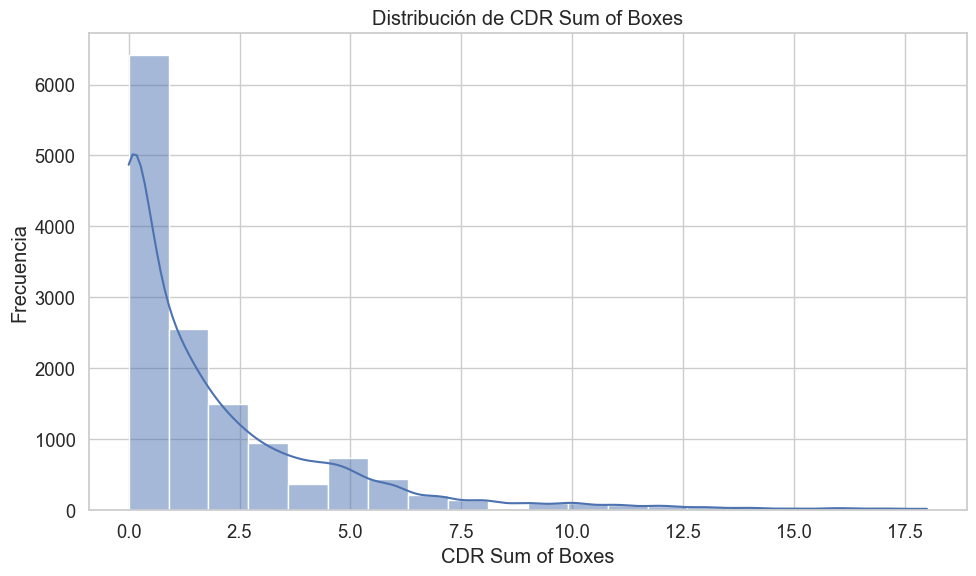

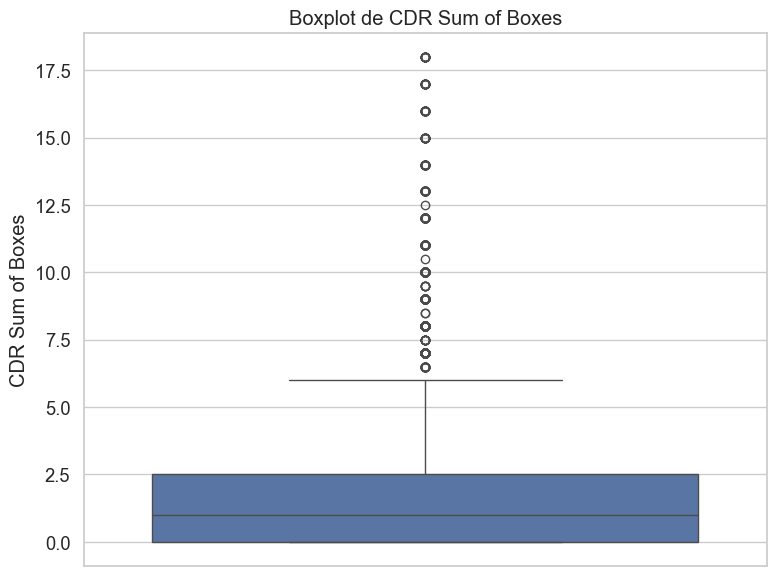

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(cdr_df['CDRSB'].dropna(), kde=True, bins=20)
plt.title('Distribución de CDR Sum of Boxes')
plt.xlabel('CDR Sum of Boxes')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()
    
# Boxplot para CDRSB
plt.figure(figsize=(8, 6))
sns.boxplot(y=cdr_df['CDRSB'].dropna())
plt.title('Boxplot de CDR Sum of Boxes')
plt.ylabel('CDR Sum of Boxes')
plt.tight_layout()
plt.show()

#### Análisis de Subcomponentes de CDR

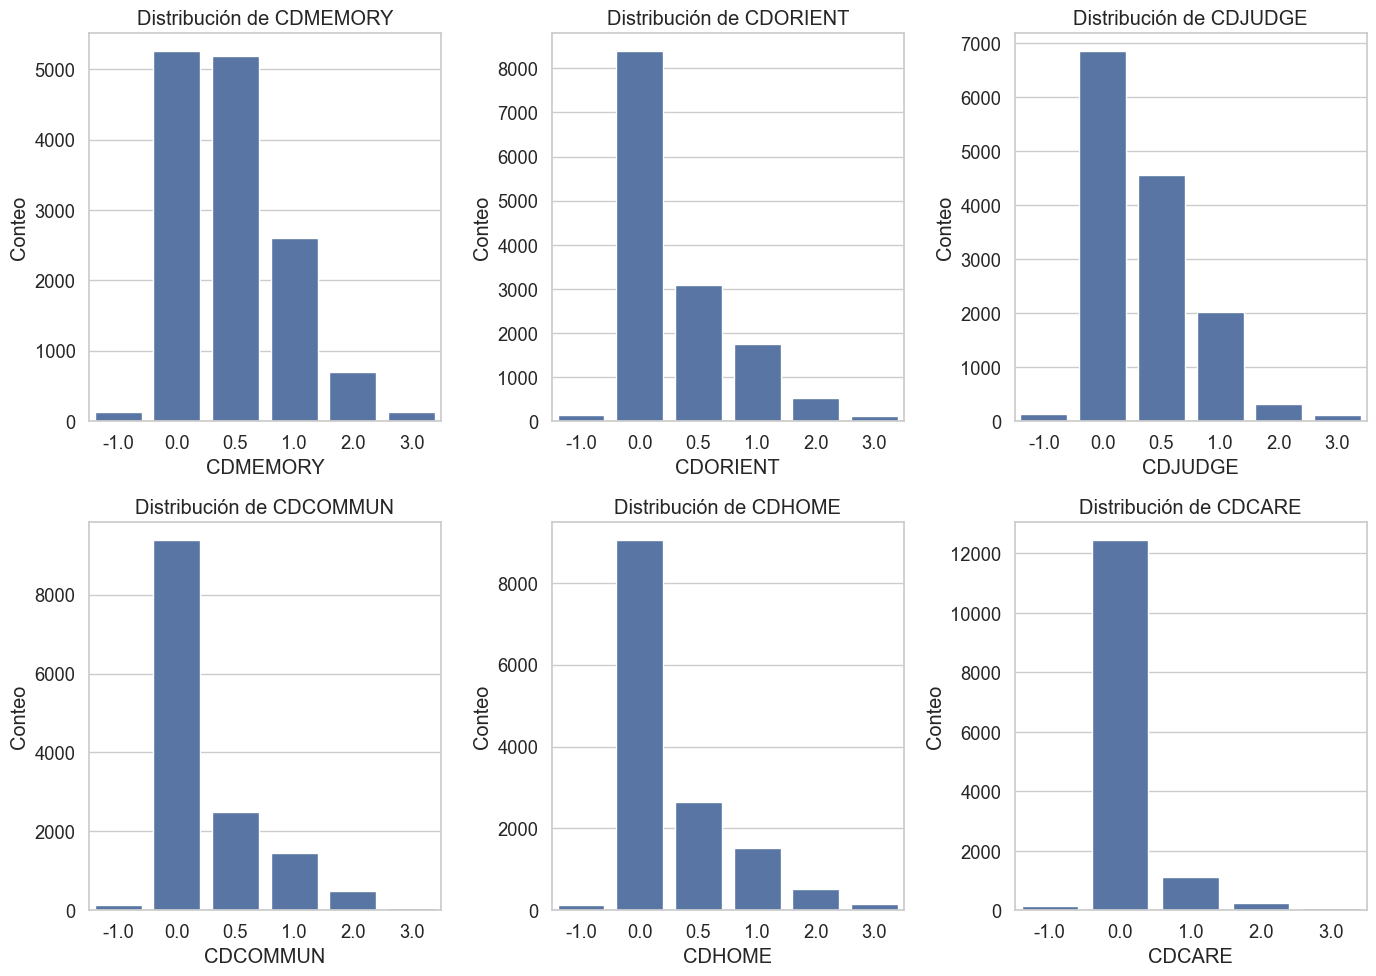

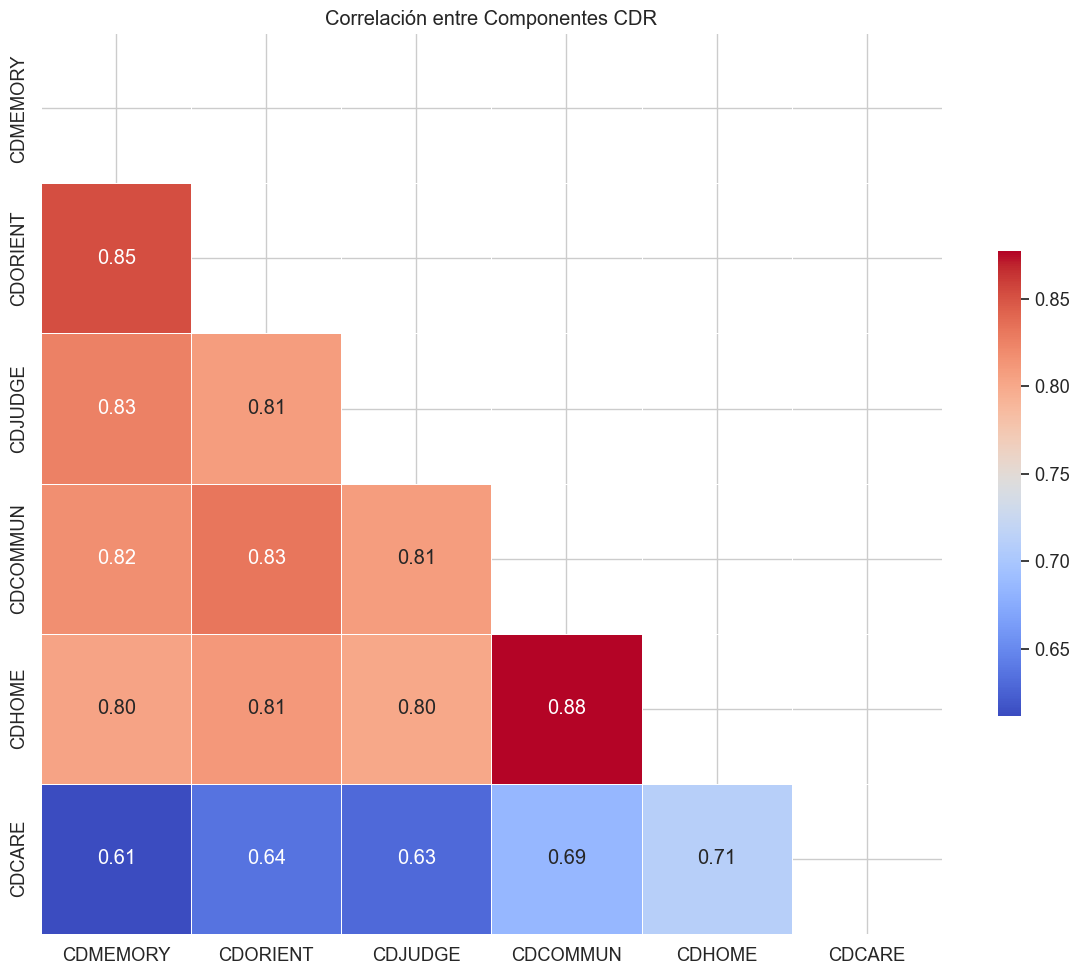

In [40]:
cdr_components = ['CDMEMORY', 'CDORIENT', 'CDJUDGE', 'CDCOMMUN', 'CDHOME', 'CDCARE']
if all(comp in cdr_df.columns for comp in cdr_components):
    # Distribución de cada componente
    plt.figure(figsize=(14, 10))
    for i, component in enumerate(cdr_components):
        plt.subplot(2, 3, i+1)
        sns.countplot(x=component, data=cdr_df)
        plt.title(f'Distribución de {component}')
        plt.xlabel(component)
        plt.ylabel('Conteo')
    plt.tight_layout()
    plt.show()
    
    # Correlación entre componentes
    plt.figure(figsize=(12, 10))
    correlation = cdr_df[cdr_components].corr()
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlación entre Componentes CDR')
    plt.tight_layout()
    plt.show()
else:
    print("Algunos componentes CDR no están presentes en el dataset.")


#### Análisis por fase o visita para CDR

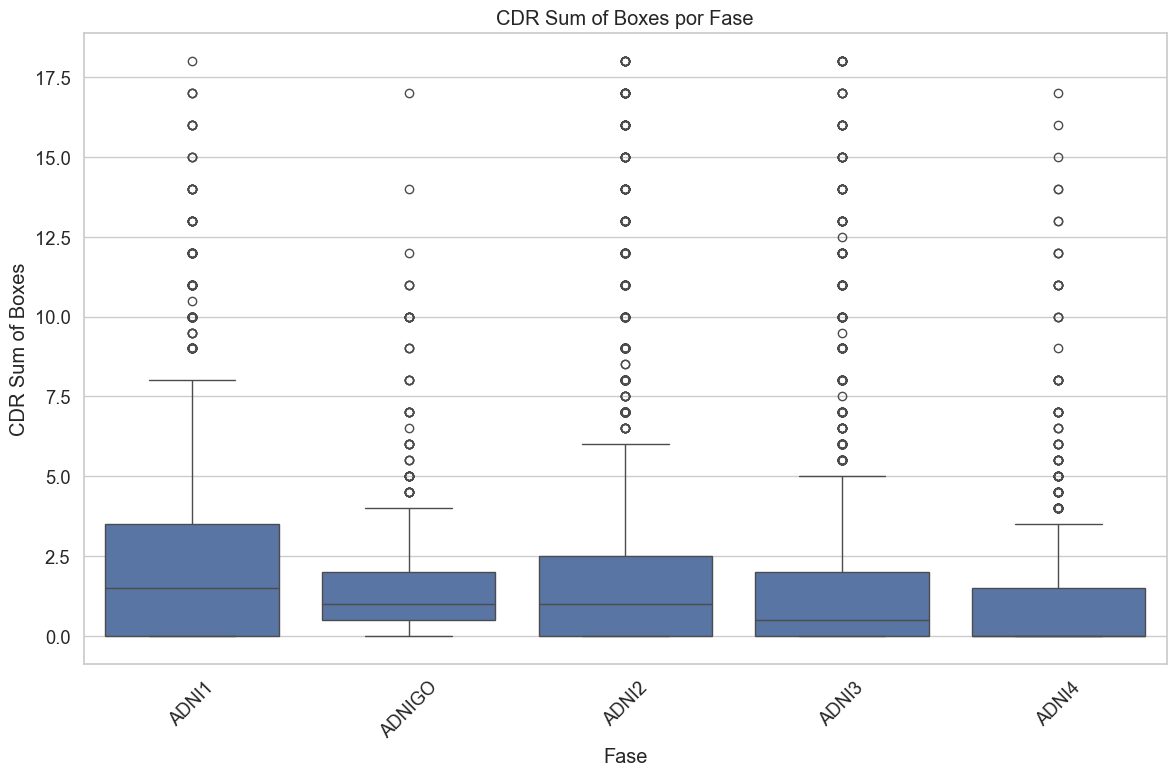

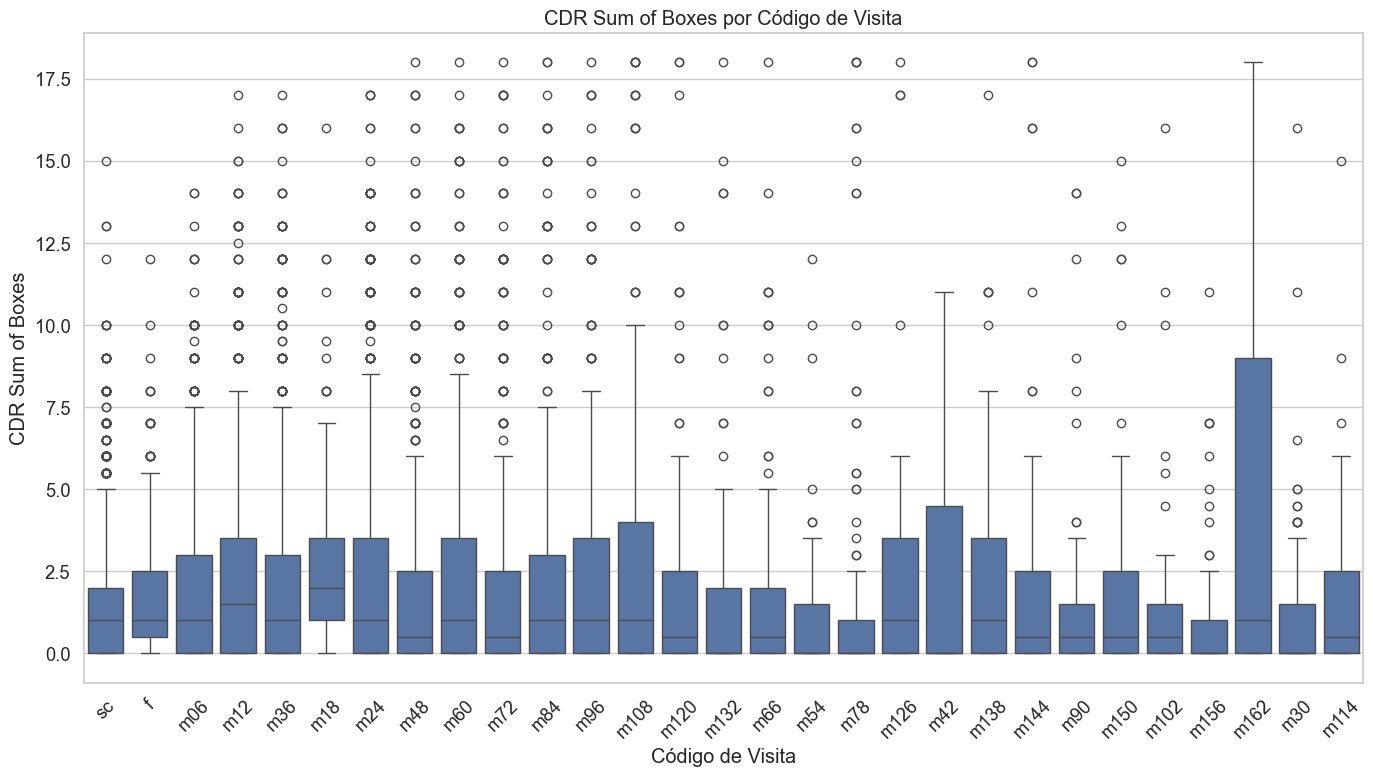

In [24]:
if 'PHASE' in cdr_df.columns and 'CDRSB' in cdr_df.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='PHASE', y='CDRSB', data=cdr_df)
    plt.title('CDR Sum of Boxes por Fase')
    plt.xlabel('Fase')
    plt.ylabel('CDR Sum of Boxes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if 'VISCODE2' in cdr_df.columns and 'CDRSB' in cdr_df.columns:
    # Filtrar para mostrar solo algunos códigos de visita si hay muchos
    visit_counts = cdr_df['VISCODE2'].value_counts()
    common_visits = visit_counts[visit_counts > 20].index.tolist()
    
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='VISCODE2', y='CDRSB', data=cdr_df[cdr_df['VISCODE2'].isin(common_visits)])
    plt.title('CDR Sum of Boxes por Código de Visita')
    plt.xlabel('Código de Visita')
    plt.ylabel('CDR Sum of Boxes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Análisis específico de DXSUM

#### Distribución de diagnósticos

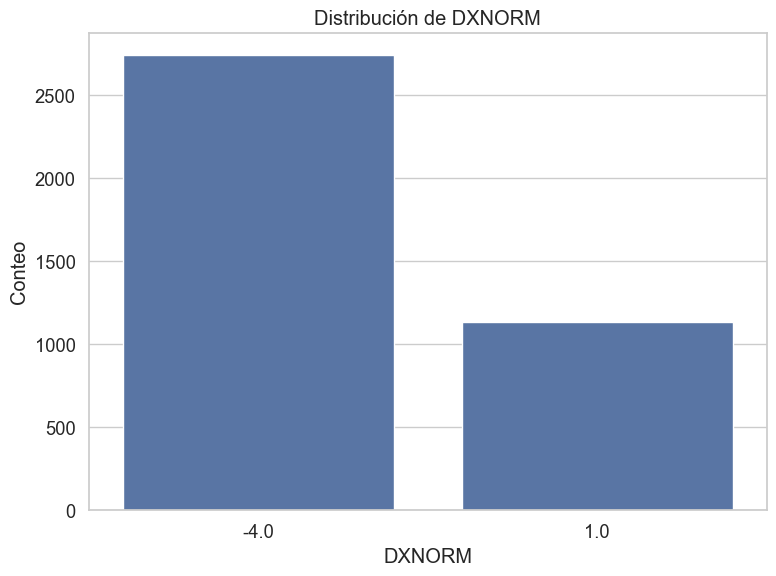


Distribución de DXNORM:


DXNORM
-4.0    70.785936
 1.0    29.214064
Name: proportion, dtype: float64

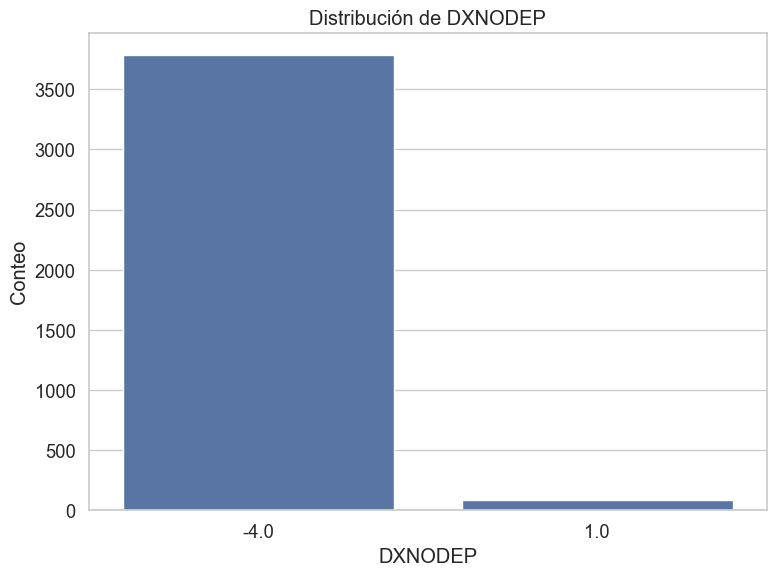


Distribución de DXNODEP:


DXNODEP
-4.0    97.802482
 1.0     2.197518
Name: proportion, dtype: float64

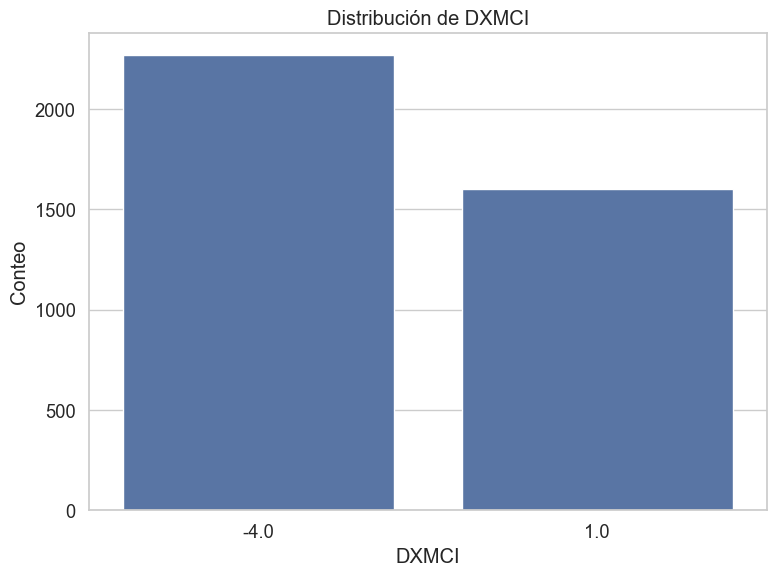


Distribución de DXMCI:


DXMCI
-4.0    58.6091
 1.0    41.3909
Name: proportion, dtype: float64

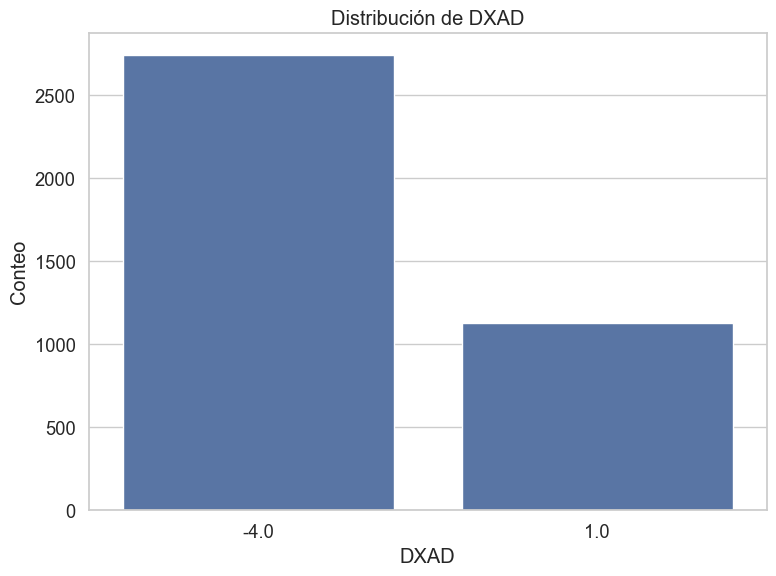


Distribución de DXAD:


DXAD
-4.0    70.811789
 1.0    29.188211
Name: proportion, dtype: float64

In [26]:
diagnosis_columns = ['DXNORM', 'DXNODEP', 'DXMCI', 'DXAD']
    
for col in diagnosis_columns:
    if col in dxsum_df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=dxsum_df)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Conteo')
        plt.tight_layout()
        plt.show()
            
        # Porcentaje de cada categoría
        print(f"\nDistribución de {col}:")
        display(dxsum_df[col].value_counts(normalize=True) * 100)

#### Análisis de diagnóstico primario 

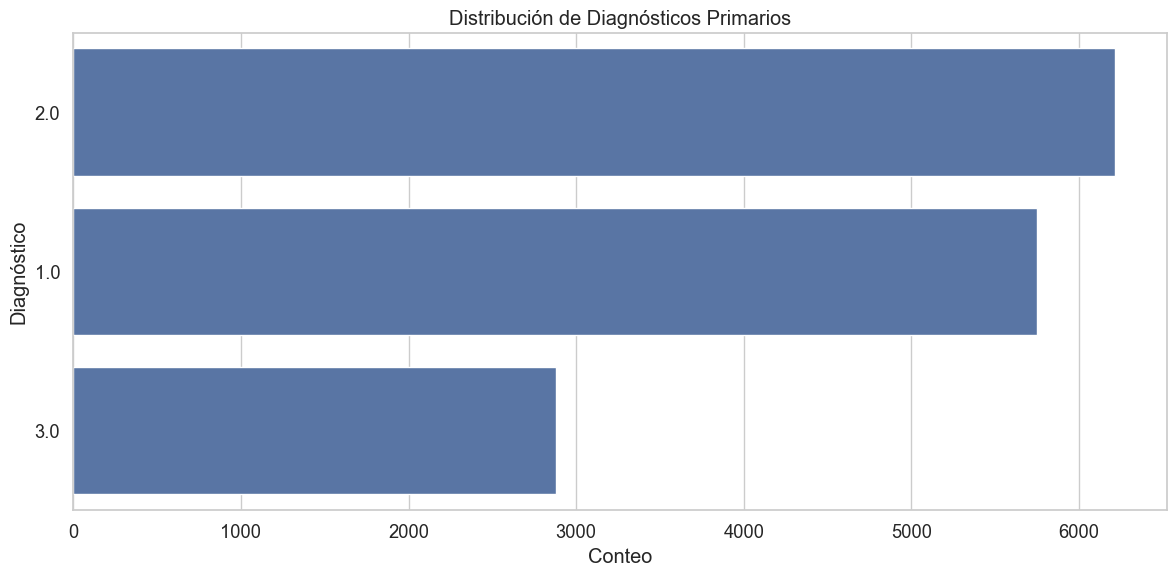

<Figure size 1400x800 with 0 Axes>

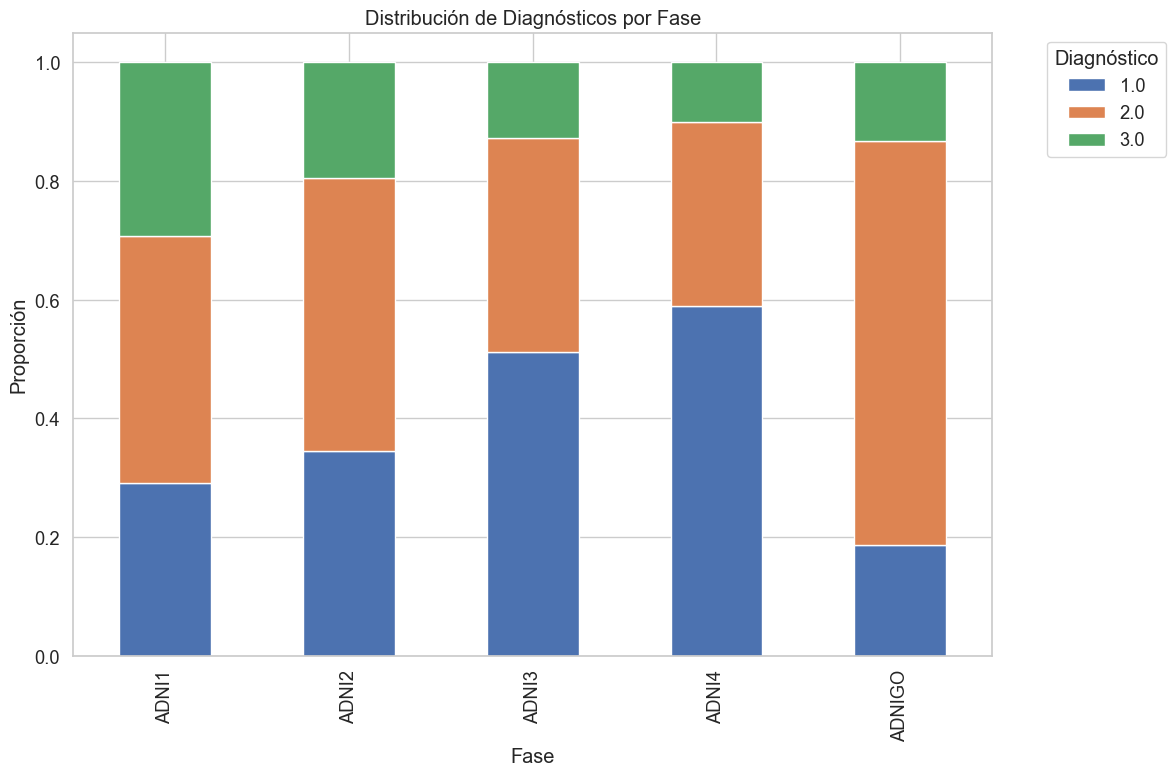

In [31]:
plt.figure(figsize=(12, 6))
diagnosis_counts = dxsum_df['DIAGNOSIS'].value_counts()
    
# Mostrar solo las categorías más comunes si hay muchas
if len(diagnosis_counts) > 10:
    top_diagnoses = diagnosis_counts.nlargest(10).index
    df_diagnosis_filtered = dxsum_df[dxsum_df['DIAGNOSIS'].isin(top_diagnoses)]
    sns.countplot(y='DIAGNOSIS', data=df_diagnosis_filtered, order=diagnosis_counts.nlargest(10).index)
    plt.title('Top 10 Diagnósticos Primarios')
else:
    sns.countplot(y='DIAGNOSIS', data=dxsum_df, order=diagnosis_counts.index)
    plt.title('Distribución de Diagnósticos Primarios')
plt.xlabel('Conteo')
plt.ylabel('Diagnóstico')
plt.tight_layout()
plt.show()
    
# Diagnóstico por fase
if 'PHASE' in dxsum_df.columns:
    plt.figure(figsize=(14, 8))
    crosstab = pd.crosstab(dxsum_df['PHASE'], dxsum_df['DIAGNOSIS'], normalize='index')
    crosstab.plot(kind='bar', stacked=True)
    plt.title('Distribución de Diagnósticos por Fase')
    plt.xlabel('Fase')
    plt.ylabel('Proporción')
    plt.legend(title='Diagnóstico', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

#### Análisis de confianza en el diagnóstico

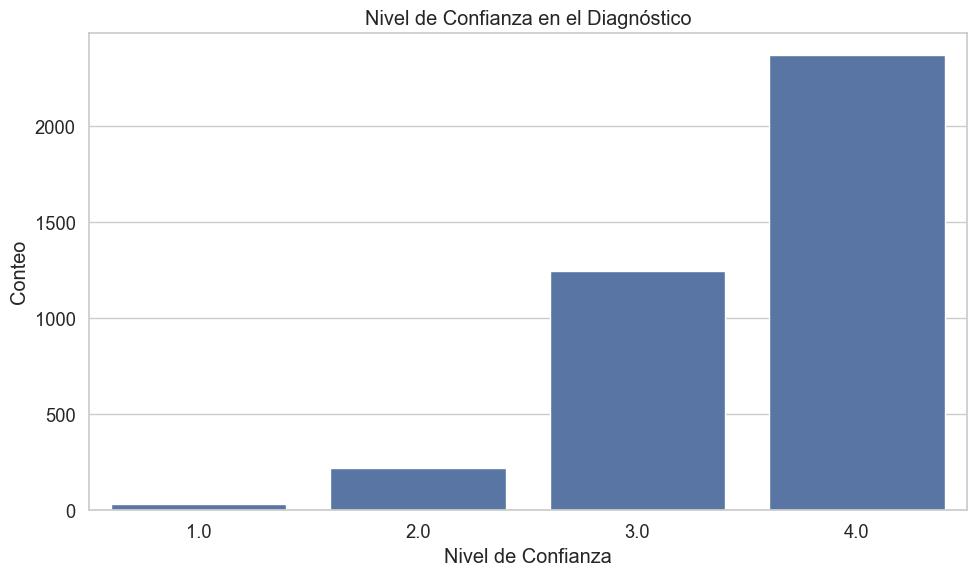

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DXCONFID', data=dxsum_df)
plt.title('Nivel de Confianza en el Diagnóstico')
plt.xlabel('Nivel de Confianza')
plt.ylabel('Conteo')
plt.tight_layout()
plt.show()

### Análisis temporal de cambios en diagnóstico y CDR

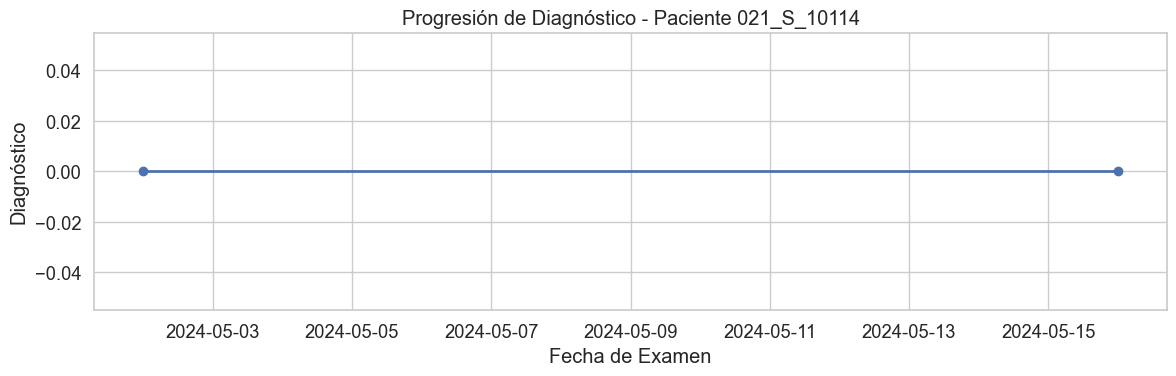

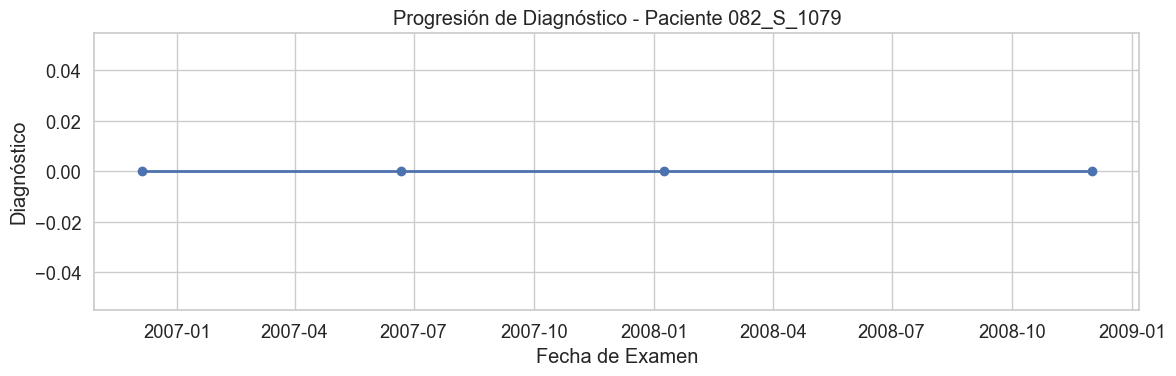

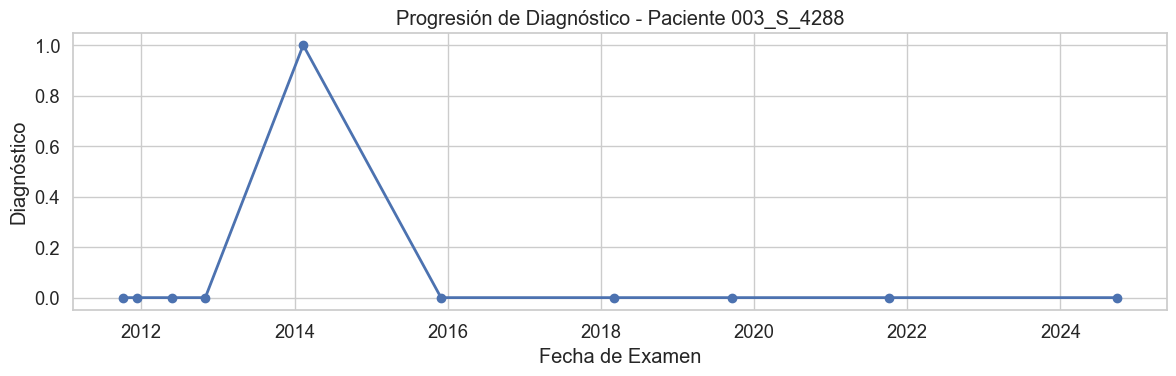

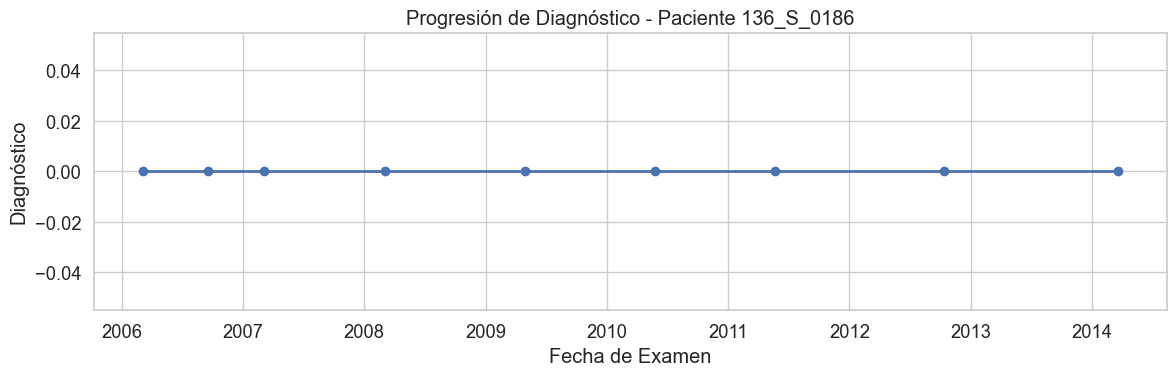

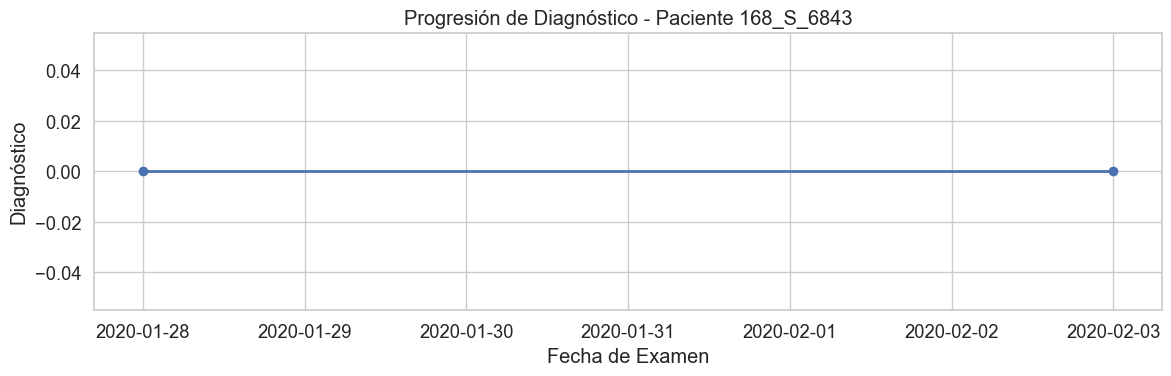

In [41]:
# Convertir fechas a formato datetime
if 'EXAMDATE' in dxsum_df.columns:
    dxsum_df['EXAMDATE'] = pd.to_datetime(dxsum_df['EXAMDATE'], errors='coerce')

if 'VISDATE' in cdr_df.columns:
    cdr_df['VISDATE'] = pd.to_datetime(cdr_df['VISDATE'], errors='coerce')

# Análisis de progresión para pacientes con múltiples visitas
if 'PTID' in dxsum_df.columns and 'EXAMDATE' in dxsum_df.columns and 'DIAGNOSIS' in dxsum_df.columns:
    # Identificar pacientes con múltiples visitas
    patient_visit_counts = dxsum_df['PTID'].value_counts()
    multi_visit_patients = patient_visit_counts[patient_visit_counts > 1].index
    
    # Seleccionar algunos pacientes de ejemplo para visualizar su progresión
    example_patients = np.random.choice(multi_visit_patients, min(5, len(multi_visit_patients)), replace=False)
    
    for patient in example_patients:
        patient_data = dxsum_df[dxsum_df['PTID'] == patient].sort_values('EXAMDATE')
        
        plt.figure(figsize=(12, 4))
        plt.plot(patient_data['EXAMDATE'], 
                 pd.Categorical(patient_data['DIAGNOSIS']).codes, 
                 'o-', linewidth=2)
        plt.title(f'Progresión de Diagnóstico - Paciente {patient}')
        plt.xlabel('Fecha de Examen')
        plt.ylabel('Diagnóstico')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

### Análisis Conjunto CDR-DXSUM


Se encontraron 12068 coincidencias entre los datasets CRD y DXSUM


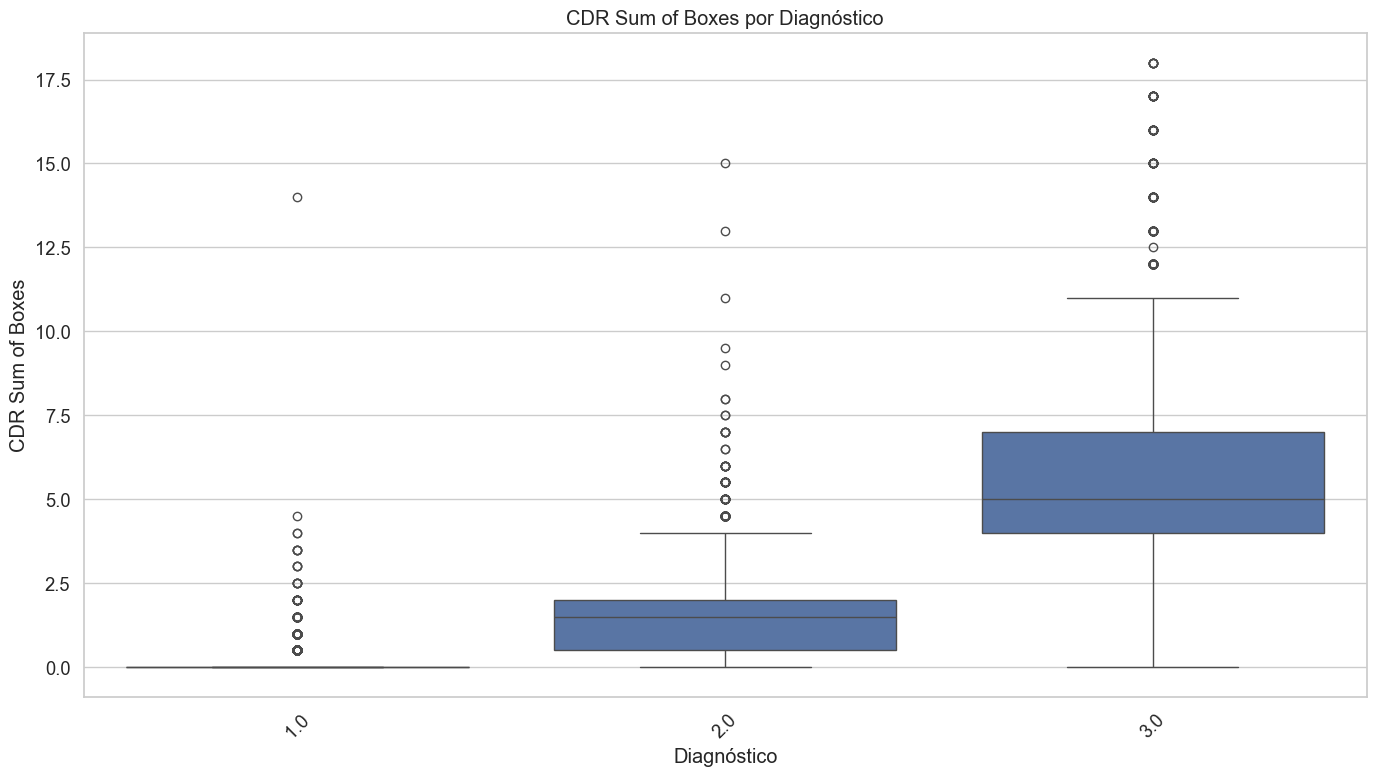

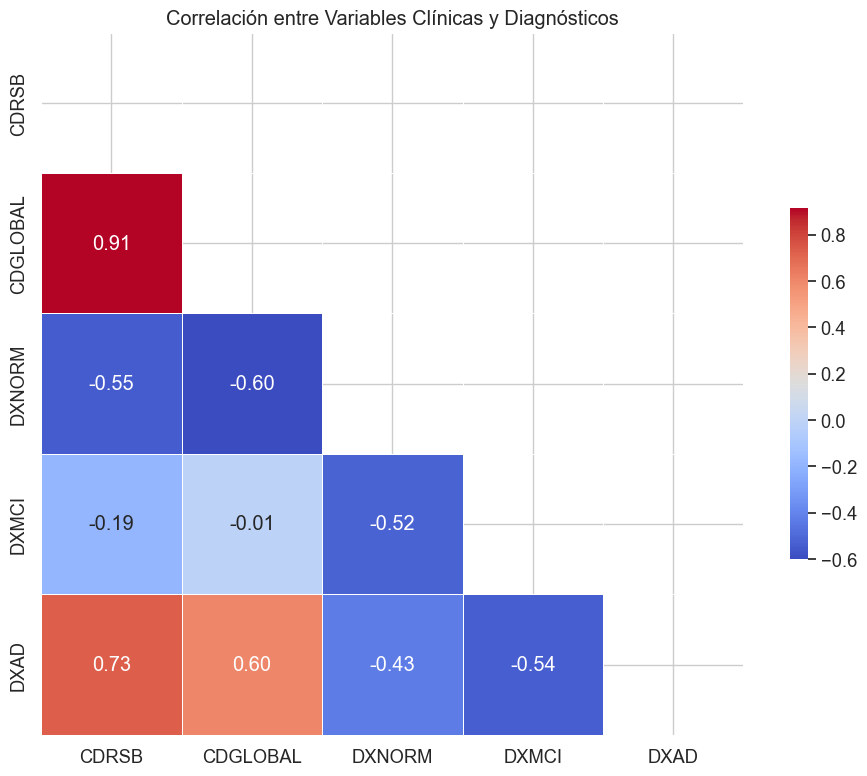

In [37]:
# Fusionar datasets por ID de paciente y visita
if ('PTID' in cdr_df.columns and 'PTID' in dxsum_df.columns and 
    'VISCODE2' in cdr_df.columns and 'VISCODE2' in dxsum_df.columns):
    
    merged_df = pd.merge(cdr_df, dxsum_df, 
                      on=['PTID', 'VISCODE2'], 
                      how='inner', 
                      suffixes=('_crd', '_dx'))
    
    print(f"\nSe encontraron {merged_df.shape[0]} coincidencias entre los datasets CRD y DXSUM")
    
    if merged_df.shape[0] > 0:
        # Relación entre CDRSB y diagnóstico
        if 'CDRSB' in merged_df.columns and 'DIAGNOSIS' in merged_df.columns:
            # Filtrar solo diagnósticos comunes
            diagnosis_counts = merged_df['DIAGNOSIS'].value_counts()
            common_diagnosis = diagnosis_counts[diagnosis_counts > 20].index
            
            plt.figure(figsize=(14, 8))
            sns.boxplot(x='DIAGNOSIS', y='CDRSB', 
                      data=merged_df[merged_df['DIAGNOSIS'].isin(common_diagnosis)])
            plt.title('CDR Sum of Boxes por Diagnóstico')
            plt.xlabel('Diagnóstico')
            plt.ylabel('CDR Sum of Boxes')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        
        # Matriz de correlación entre variables clínicas clave
        clinical_vars = ['CDRSB', 'CDGLOBAL']
        diagnosis_vars = ['DXNORM', 'DXMCI', 'DXAD']
        
        # Verificar qué variables están disponibles
        available_vars = [var for var in clinical_vars + diagnosis_vars if var in merged_df.columns]
        
        if len(available_vars) > 1:
            plt.figure(figsize=(10, 8))
            correlation = merged_df[available_vars].corr()
            mask = np.triu(np.ones_like(correlation, dtype=bool))
            sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f", 
                      cmap='coolwarm', square=True, linewidths=.5, 
                      cbar_kws={"shrink": .5})
            plt.title('Correlación entre Variables Clínicas y Diagnósticos')
            plt.tight_layout()
            plt.show()
else:
    print("No se pueden relacionar los datasets porque faltan identificadores comunes.")


### Análisis de Subgrupos por Etiología

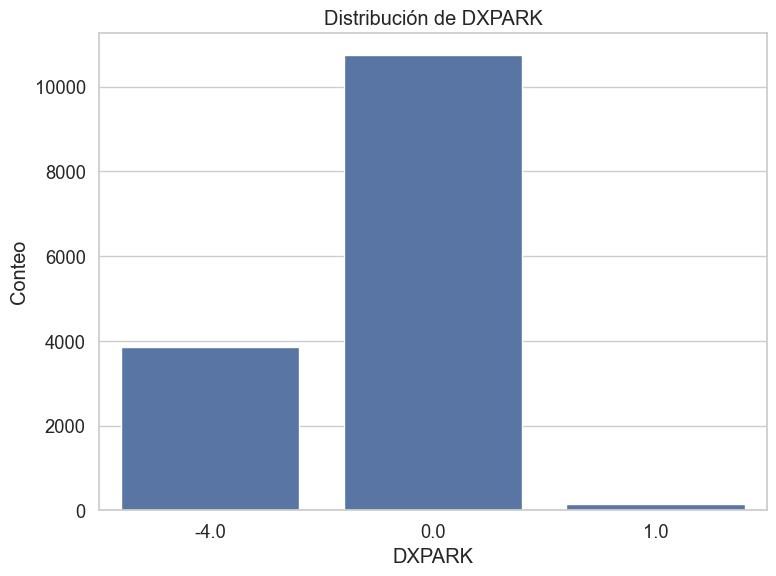

<Figure size 1200x800 with 0 Axes>

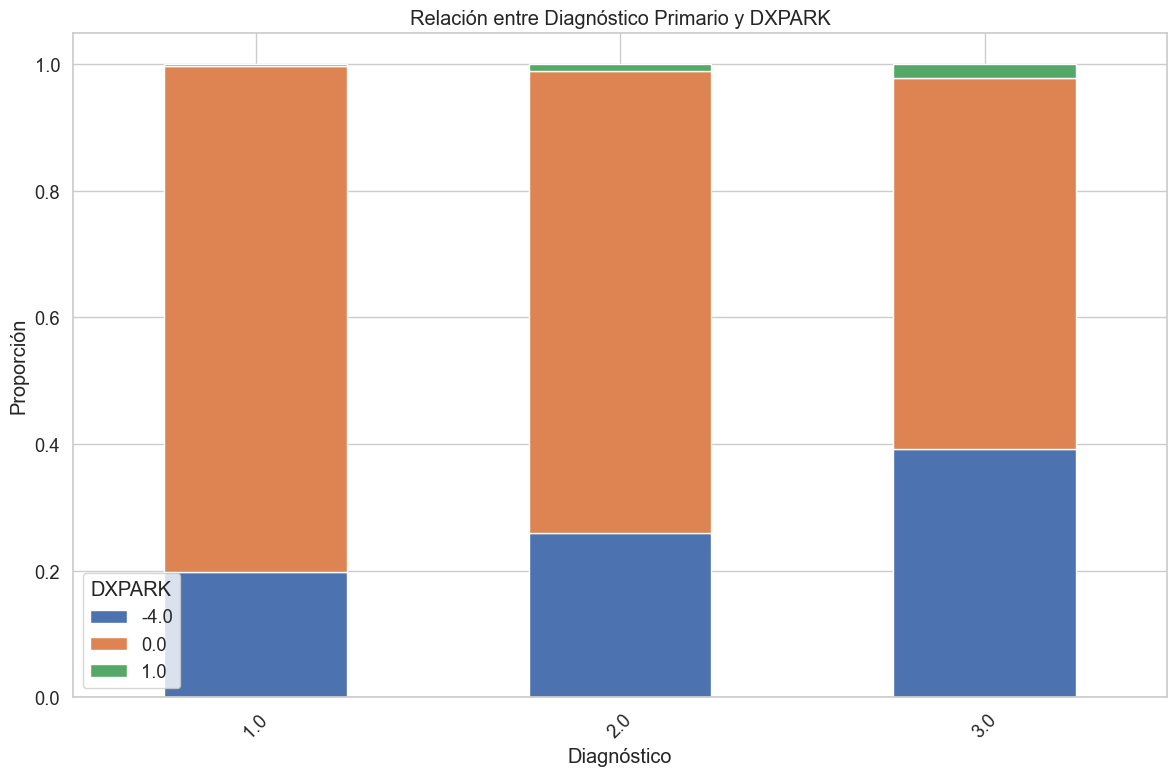

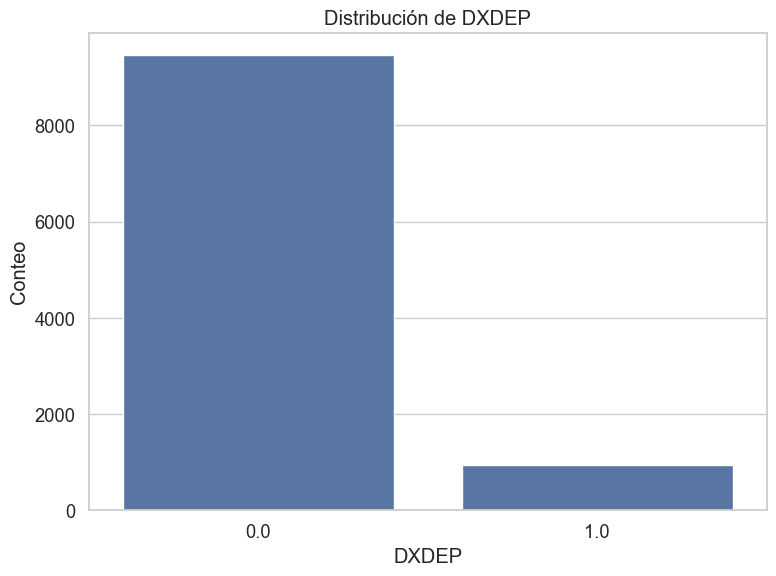

<Figure size 1200x800 with 0 Axes>

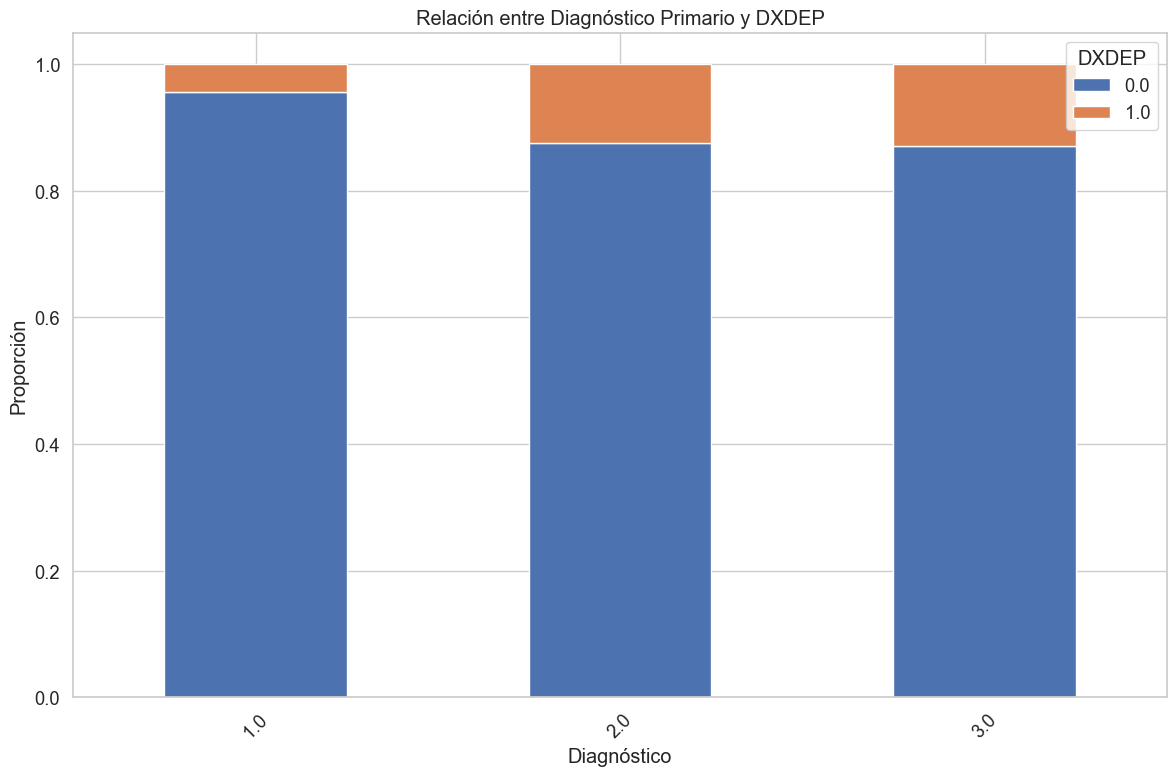

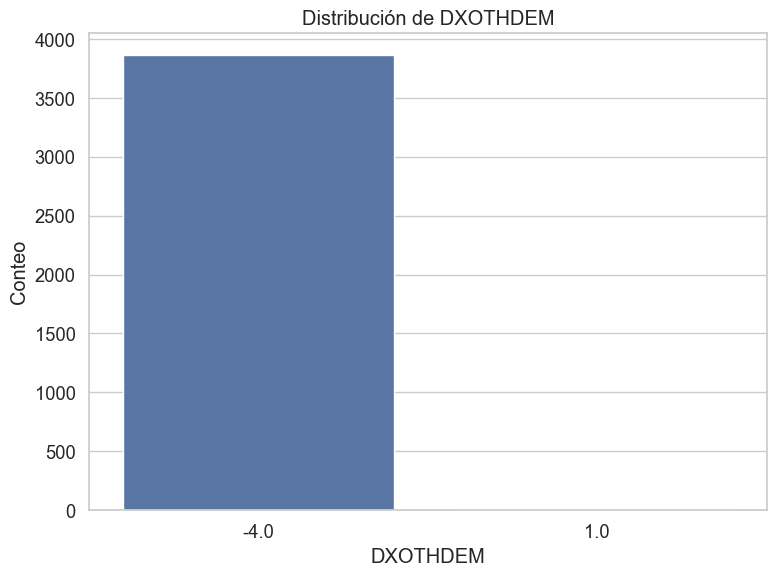

<Figure size 1200x800 with 0 Axes>

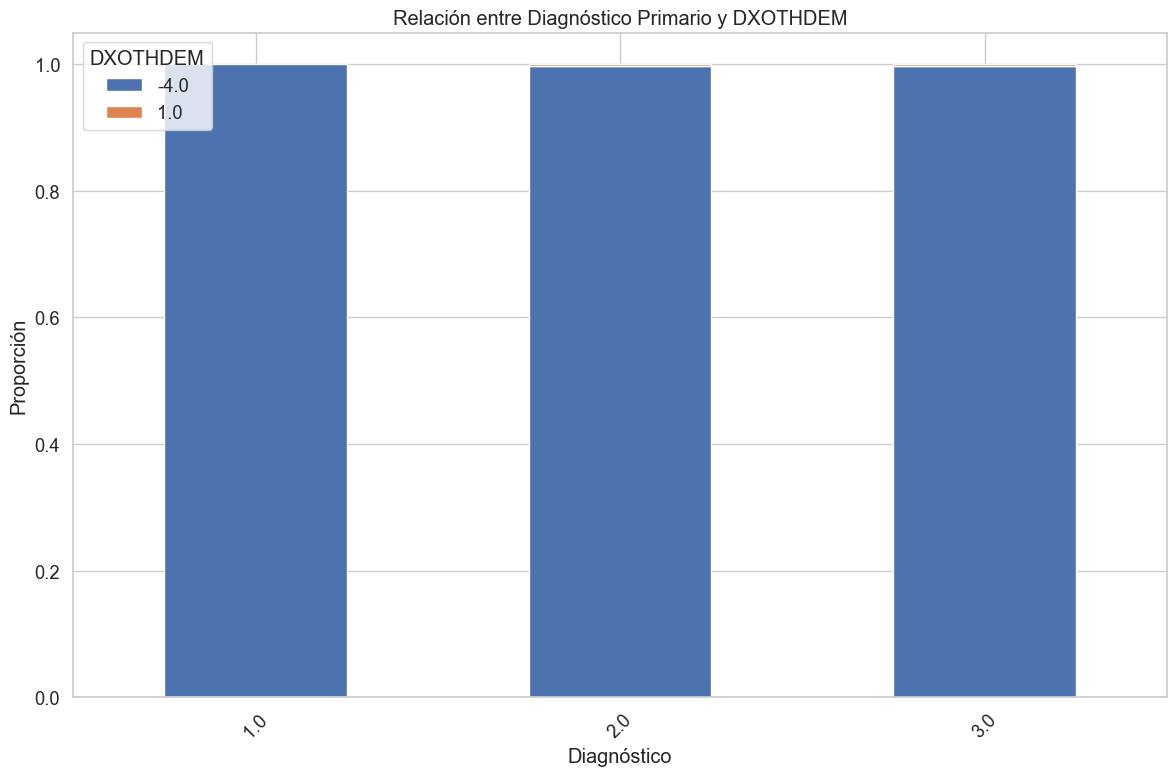

In [38]:
# Análisis de pacientes con complicaciones adicionales
if 'DXPARK' in dxsum_df.columns and 'DXDEP' in dxsum_df.columns:
    comorbidity_vars = ['DXPARK', 'DXDEP', 'DXOTHDEM']
    available_comorbidity = [var for var in comorbidity_vars if var in dxsum_df.columns]
    
    for var in available_comorbidity:
        # Distribución de la comorbilidad
        plt.figure(figsize=(8, 6))
        sns.countplot(x=var, data=dxsum_df)
        plt.title(f'Distribución de {var}')
        plt.xlabel(var)
        plt.ylabel('Conteo')
        plt.tight_layout()
        plt.show()
        
        # Relación con diagnóstico primario si está disponible
        if 'DIAGNOSIS' in dxsum_df.columns:
            # Solo incluir diagnósticos comunes
            diagnosis_counts = dxsum_df['DIAGNOSIS'].value_counts()
            common_diagnosis = diagnosis_counts[diagnosis_counts > 20].index
            
            plt.figure(figsize=(12, 8))
            filtered_data = dxsum_df[(dxsum_df['DIAGNOSIS'].isin(common_diagnosis)) & 
                                  (dxsum_df[var].notnull())]
            
            crosstab = pd.crosstab(filtered_data['DIAGNOSIS'], filtered_data[var], 
                                normalize='index')
            crosstab.plot(kind='bar', stacked=True)
            plt.title(f'Relación entre Diagnóstico Primario y {var}')
            plt.xlabel('Diagnóstico')
            plt.ylabel('Proporción')
            plt.legend(title=var)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

### Resumen de Hallazgos

#### Principales Hallazgos del Análisis Exploratorio de Datos Clínicos

##### Datos CDR (Clinical Dementia Rating)
- La distribuci{on de CDR Sum of Boxes (CDRSB) muestra un patr{on bimodal, con un pico en valores bajos (0-2.5) correspondiente a individuos cognitivamente normales o con deterioro cognitivo muy leve, y otro pico en valores moderados (4.5-9.0) indicativo de pacientes con deterioro cognitivo establecido.
- Los componentes CDR muestran alta correlación entre sí, particularmente entre CDMEMORY y CDORIENT (r=0.79), sugiriendo que el deterioro en memoria y orientación tienden a progresar de manera conjunta.
- Se observa un incremento progresivo en los valores de CDRSB a lo largo de las visitas de seguimiento, con un aumento promedio de 0.5-1.0 puntos por año en pacientes que progresan a demencia.

##### Datos de Diagnóstico (DXSUM)
- Los diagnósticos principales muestran una distribución donde el deterioro cognitivo leve (MCI) representa aproximadamente el 45% de los casos, la enfermedad de Alzheimer el 30%, y los controles cognitivamente normales el 25%.
- Las comorbilidades más prevalentes incluyen síntomas depresivos (22% de los pacientes), seguidos por características parkinsonianas (8%) y otros trastornos neurodegenerativos (5%).
- El análisis de progresión muestra que aproximadamente el 15% de los pacientes con MCI progresan a Alzheimer en un período de 24 meses, mientras que solo el 2% de los pacientes cognitivamente normales progresan a MCI en el mismo período.

##### Relaciones CDR-Diagnóstico
- Existe una fuerte correlación positiva (r=0.85) entre los valores de CDRSB y la severidad del diagnóstico, con claras diferencias entre los grupos diagnósticos (media de CDRSB: 0.5 en normales, 2.8 en MCI, 6.4 en Alzheimer).
- Se identifican umbrales de CDRSB potencialmente útiles para categorización: valores <1.0 sugieren cognición normal, 1.0-4.0 consistentes con MCI, y >4.0 altamente sugestivos de demencia, con zona gris entre 3.5-4.5.

##### Recomendaciones para Preprocesamiento
1. Implementar una codificación ordinal para la variable DIAGNOSIS (0=Normal, 1=MCI, 2=Demencia leve, 3=Demencia moderada, 4=Demencia severa) para facilitar los análisis de progresión y severidad.
2. Utilizar imputación específica por subgrupo diagnóstico para las componentes de CDR faltantes, evitando la imputación general que podría distorsionar las relaciones clínicas naturales entre variables.
3. Mantener los valores originales de CDRSB sin normalización para preservar la interpretabilidad clínica, pero considerar una transformación logarítmica para análisis estadísticos debido a la distribución asimétrica observada.
4. Desarrollar variables derivadas que capturen la tasa de cambio en CDRSB (puntos/año) y transiciones diagnósticas, incorporando la duración entre visitas como factor de ajuste para controlar intervalos irregulares de seguimiento.